In [1]:
import torch
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from torch import nn
from NetworkFeatureExtration.src.ModelWithRows import ModelWithRows
from main import init_conf_values, load_models_path
from src.A2C_Agent_Reinforce import A2C_Agent_Reinforce
import os
import shutil  
import split_folders
from NetworkFeatureExtration.src.ModelClasses.NetX.netX import NetX
from src.NetworkEnv import NetworkEnv

In [2]:
torch.manual_seed(0)
np.random.seed(0)
base_path = './OneDatasetLearning/Classification/diabetes/'

In [3]:
# models_path = load_models_path(base_path, 'all')
# all_models = models_path[0][1]
# all_models = list(map(os.path.basename, all_models))
# train_models, test_models = train_test_split(all_models, test_size=0.2)
# 
# df_train = DataFrame(data = train_models)
# df_train.to_csv(base_path + "train_models.csv")
# 
# df_test = DataFrame(data = test_models)
# df_test.to_csv(base_path + "test_models.csv")

In [4]:


init_conf_values()
models_path = load_models_path(base_path, 'train')
agent = A2C_Agent_Reinforce(models_path)
agent.train()

Episode 0/100
Episode 1/100
Episode 2/100
Episode 3/100
Episode 4/100
Episode 5/100
Episode 6/100
Episode 7/100
Episode 8/100
Episode 9/100
Episode 10/100
Episode 11/100
Episode 12/100
Episode 13/100
Episode 14/100
Episode 15/100
Episode 16/100
Episode 17/100
Episode 18/100
Episode 19/100
Episode 20/100
Episode 21/100
Episode 22/100
Episode 23/100
Episode 24/100
Episode 25/100
Episode 26/100
Episode 27/100
Episode 28/100
Episode 29/100
Episode 30/100
Episode 31/100
Episode 32/100
Episode 33/100
Episode 34/100
Episode 35/100
Episode 36/100
Episode 37/100
Episode 38/100
Episode 39/100
Episode 40/100
Episode 41/100
Episode 42/100
Episode 43/100
Episode 44/100
Episode 45/100
Episode 46/100
Episode 47/100
Episode 48/100
Episode 49/100
Episode 50/100
Episode 51/100
Episode 52/100
Episode 53/100
Episode 54/100
Episode 55/100
Episode 56/100
Episode 57/100
Episode 58/100
Episode 59/100
Episode 60/100
Episode 61/100
Episode 62/100
Episode 63/100
Episode 64/100
Episode 65/100
Episode 66/100
Episo

In [ ]:
torch.save(agent.actor_model.state_dict(), "./models/Reinforce_One_Dataset/actor_model.pt")
torch.save(agent.critic_model.state_dict(), "./models/Reinforce_One_Dataset/critic_model.pt")


In [5]:
def get_linear_layer(row):
    for l in row:
        if type(l) is nn.Linear:
            return l

def get_model_layers(model):
    new_model_with_rows = ModelWithRows(model)
    linear_layers = [(get_linear_layer(x).in_features, get_linear_layer(x).out_features) for x in new_model_with_rows.all_rows]
    return str(linear_layers)

In [8]:
mode = 'train'
models_path = load_models_path(base_path, mode)
env = NetworkEnv(models_path)
action_to_compression = {
    0: 0.9,
    1: 0.8,
    2: 0.7,
    3: 0.6
}


results = DataFrame(columns=['model', 'new_acc', 'origin_acc', 'new_param',
                             'origin_param', 'new_model_arch', 'origin_model_arch'])

for i in range(len(env.all_networks)):
    print(i)
    state = env.reset()
    done = False

    while not done:
        value = agent.critic_model(state)
        dist = agent.actor_model(state)
    
        action = dist.sample()
        compression_rate = action_to_compression[action.cpu().numpy()[0]]
        next_state, reward, done = env.step(compression_rate)
        state = next_state
        
    new_lh = env.create_learning_handler(env.current_model)
    origin_lh = env.create_learning_handler(env.loaded_model.model)
    
    new_acc = new_lh.evaluate_model()
    origin_acc = origin_lh.evaluate_model()
    
    new_params = env.calc_num_parameters(env.current_model)
    origin_params = env.calc_num_parameters(env.loaded_model.model)
    
    model_name = env.all_networks[env.net_order[env.curr_net_index - 1]][1]
    
    new_model_with_rows = ModelWithRows(env.current_model)
    
    
    results = results.append({'model':model_name,
                              'new_acc': new_acc,
                              'origin_acc': origin_acc,
                              'new_param': new_params,
                              'origin_param':origin_params,
                              'new_model_arch': get_model_layers(env.current_model),
                              'origin_model_arch': get_model_layers(env.loaded_model.model)}, ignore_index=True)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [9]:
results.to_csv("./models/Reinforce_One_Dataset/results_{}5.csv".format(mode))


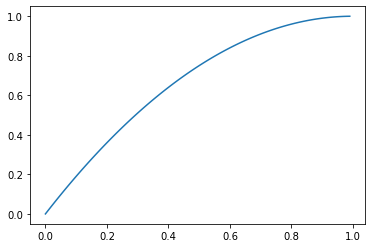

In [11]:
import matplotlib.pyplot as plt
p = np.arange(0,1,0.01)

y = p * (2-p)

plt.plot(p,y)
plt.show()

